In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as sps
import scipy as sp

In [109]:
def WN(sigma,n):
    return np.random.normal(0,sigma, n + 1)

def emp_kow(X_t, h):
    n = len(X_t)
    mu = np.mean(X_t)
    suma = 0
    for i in range(n-abs(h)):
        suma += (X_t[i]-mu)*(X_t[i+abs(h)] - mu)
    return 1/n*suma

def emp_kor(X_t ,h):
    return emp_kow(X_t,h)/emp_kow(X_t,0)

# Zadanie 1

In [110]:
def teo_kow(h,sigma,teta):
    return sigma*np.power(teta,abs(h))/(1-teta**2)

def teo_kor(h,teta):
    return np.power(teta,abs(h))


In [111]:
n = 10**3
x_0 = 0
teta = 0.2
sigma = 0.4
h = np.arange(0,21,1)

x = np.zeros(n)
x[0] = x_0
for i in range(1,n):
    x[i] = teta*x[i-1] + np.random.normal(0,np.sqrt(sigma))

kow_emp = np.zeros(len(h))
kow_teo = np.zeros(len(h))
kor_emp = np.zeros(len(h))
kor_teo = np.zeros(len(h))

for i in range(len(h)):
    kow_emp[i] = emp_kow(x,h[i])
    kow_teo[i] = teo_kow(h[i],sigma,teta)
    kor_emp[i] = emp_kor(x,h[i])
    kor_teo[i] = teo_kor(h[i],teta)

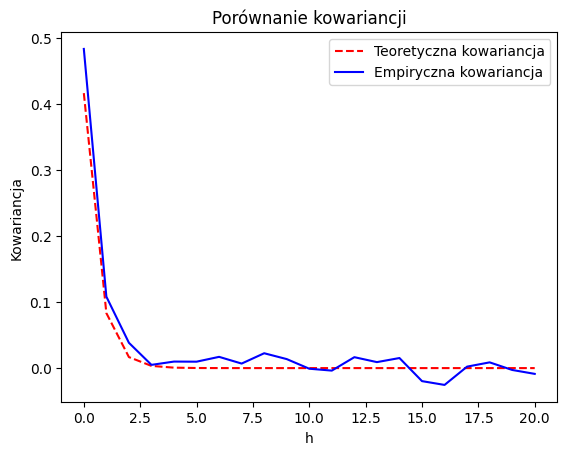

In [112]:
plt.plot(h, kow_teo, 'r--', label='Teoretyczna kowariancja')
plt.plot(h, kow_emp, 'b-', label='Empiryczna kowariancja')
plt.xlabel('h')
plt.ylabel('Kowariancja')
plt.title('Porównanie kowariancji')
plt.legend()

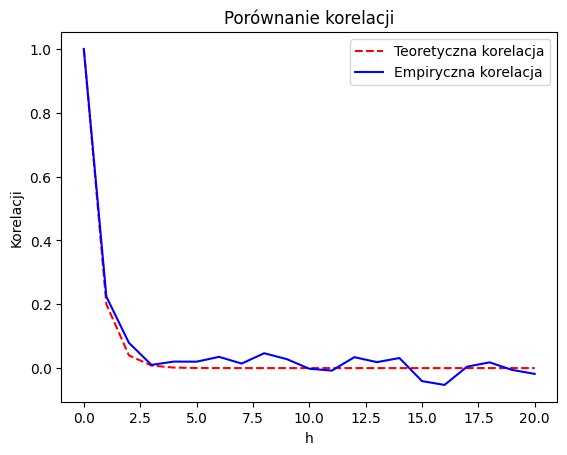

In [113]:
plt.plot(h, kor_teo, 'r--', label='Teoretyczna korelacja')
plt.plot(h, kor_emp, 'b-', label='Empiryczna korelacja')
plt.xlabel('h')
plt.ylabel('Korelacji')
plt.title('Porównanie korelacji')
plt.legend()

# Zadanie 2

In [114]:
def generate_kow_kor():
    n = 10**3
    x_0 = 0
    teta = 0.2
    sigma = 0.4
   

    x = np.zeros(n)
    x[0] = x_0
    for i in range(1,n):
        x[i] = teta*x[i-1] + np.random.normal(0,np.sqrt(sigma))

    return kow_emp, kor_emp

In [115]:
m = 100
h = np.arange(0,21,1)
trajectories = np.zeros((m,n))
for i in range(m):
    trajectories[i,0] = 0
    for j in range(1,n):
        trajectories[i,j] = teta*trajectories[i,j-1] + np.random.normal(0,np.sqrt(sigma))

kow_traj = np.zeros((len(h),m))
kor_traj = np.zeros((len(h),m))
for i in range(len(h)):
    for j in range(m):
        kow_traj[i,j] = emp_kow(trajectories[j],h[i])
        kor_traj[i,j] = emp_kor(trajectories[j],h[i])

In [116]:
confidence = 0.95
alpha = (1 - confidence) / 2
kow_quantiles_lower = np.zeros(len(h))
kow_quantiles_upper = np.zeros(len(h))
kor_quantiles_lower = np.zeros(len(h))
kor_quantiles_upper = np.zeros(len(h))
for i in range(len(h)):
    kow_quantiles_lower[i] = np.percentile(kow_traj[i],100*alpha)
    kow_quantiles_upper[i] = np.percentile(kow_traj[i],100*(1-alpha))
    kor_quantiles_lower[i] = np.percentile(kor_traj[i],100*alpha)
    kor_quantiles_upper[i] = np.percentile(kor_traj[i],100*(1-alpha))

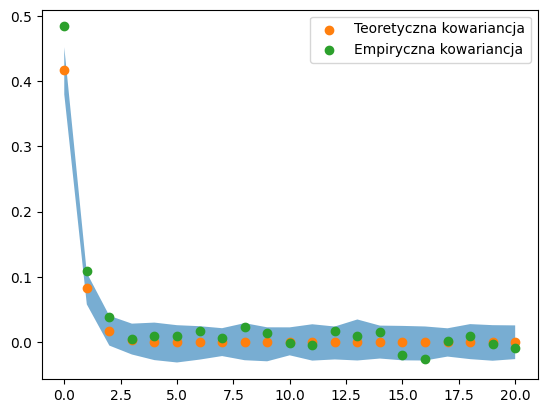

In [123]:
plt.fill_between(h,kow_quantiles_lower,kow_quantiles_upper,alpha = 0.6)
plt.scatter(h, kow_teo, label='Teoretyczna kowariancja')
plt.scatter(h, kow_emp, label='Empiryczna kowariancja')
plt.title('Kowariancja')
plt.legend()

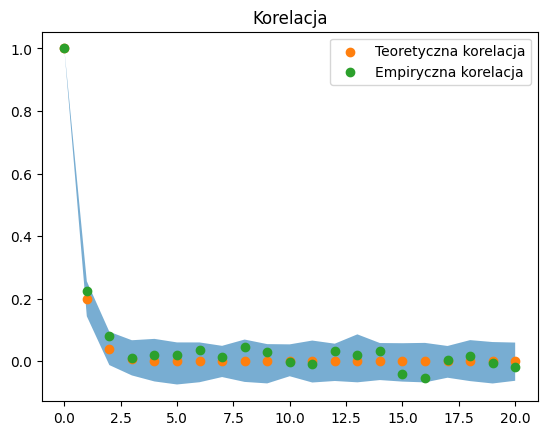

In [125]:
plt.fill_between(h,kor_quantiles_lower,kor_quantiles_upper,alpha = 0.6)
plt.scatter(h, kor_teo, label='Teoretyczna korelacja')
plt.scatter(h, kor_emp, label='Empiryczna korelacja')
plt.title('Korelacja')
plt.legend()